In [117]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Comment: We are importing the libraries that we will be using in the initial stages of the model building - loading data, making basic EDA and cleaning and preprocessing data.

In [118]:
data = pd.read_csv("/workspaces/hw1-end-to-end-ml/data/bank-full.csv",sep=';')

Comment: Using the read_csv() function, I uploaded our dataset and saved it in a dataframe named data. The data was separated by ; in the csv file, so I used the sep argument to make sure we get the data in the form we need.

In [119]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

Comment: We use the head() function to examine the dataframe initially. 

In [120]:
data.info()
data.isna().sum()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

Comment: I used the info() and isna().sum() to check the data types and look for missing values. So upon doing this, we infer that there are no null values in the dataset. Additionally, I used shape argument to find out that there are 41188 rows and 21 columns, to double check with the information that info() had already given us.

Comment: In the following lines of code, we will do basic EDA on the variables that are non numeric.

In [121]:
data["job"].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Comment: The job variable has 330 values that are labeled unknown, that we will deal with later in the code. The other values look fine with admin and blur-collar variables accounting fot almost 50% of the data.

In [122]:
data["marital"].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Comment: Once again, there are 80 unknowns in the marital variable. We will deal with all the unknowns later. 

In [123]:
data["education"].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Comment: There are 1731 unknowns that need to be dealt with as we proceed to the next steps.

In [124]:
data["default"].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Comment: There are 8597 unknowns in this variable. Additionally, just three of the remaining 32591 people have defaulted credit balance in the past. Considering this is a very minute percentage of the whole dataset, it might be good to not use this variable in our model. But we will get to that conclusion later.

In [125]:
data["housing"].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Comment: There are 990 unknowns in the housing variable in the dataset.

In [126]:
data["loan"].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

Comment: There are 990 unknowns in the loan variable

In [127]:
data["contact"].value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

Comment: There are no unknowns in the telephome variable.

In [128]:
data["month"].value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

Comment: January and February are not present in the variable, other 10 months are there in the variable.

In [129]:
data["day_of_week"].value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

Comment: Saturday and Sunday are not in the values of the day_of_week variable while other weekdays are present. 

In [130]:
data["poutcome"].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

Comment: The poutcome variable has 35563 non existent values. This is a type of value in the variable, which says the result of the previous marketing campaign. This is not like unknown values, which are basically missing values. 

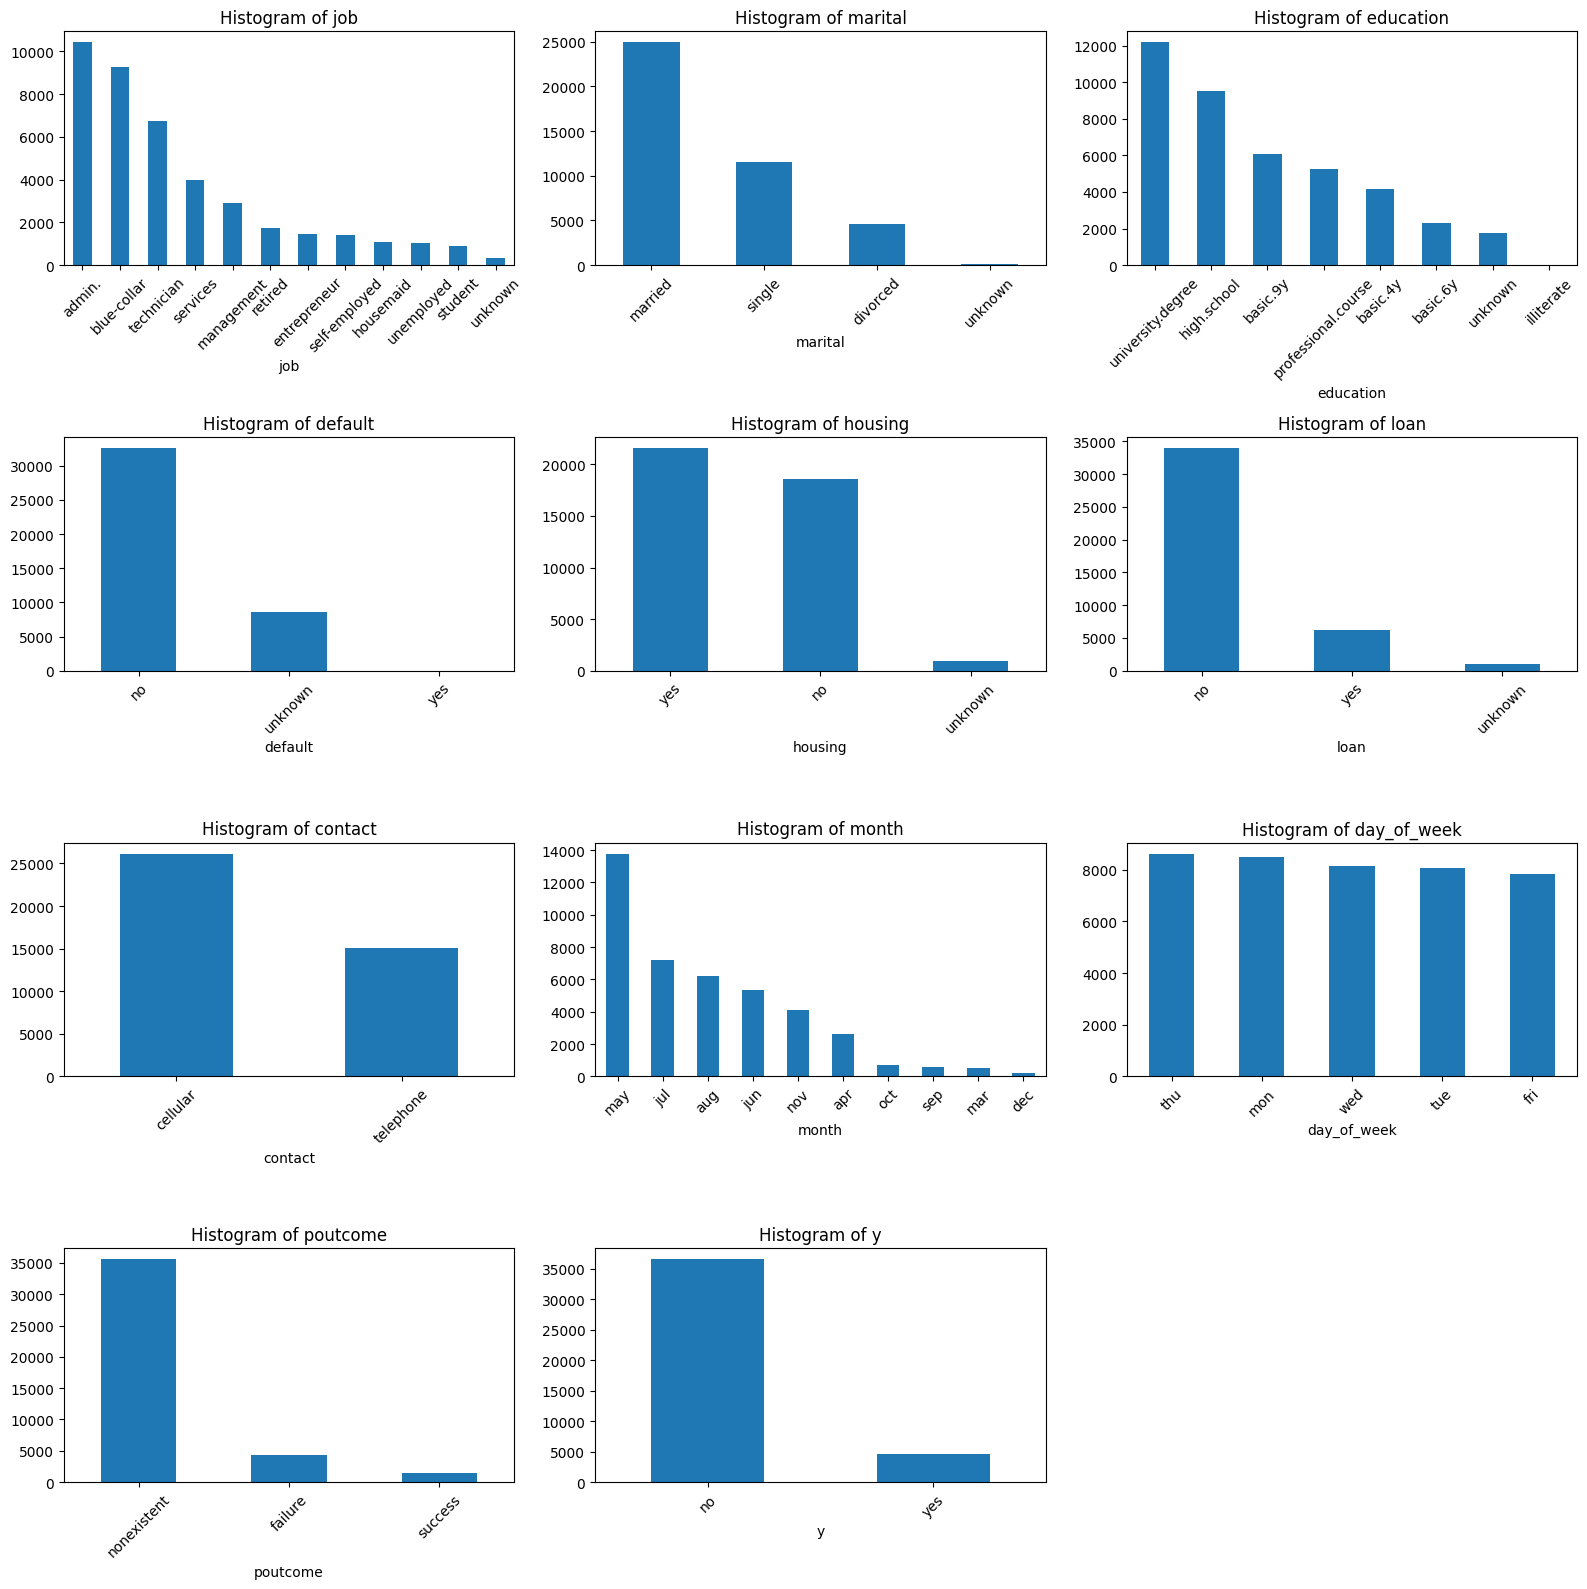

In [131]:
object_columns = data.select_dtypes(include=['object'])

n = len(object_columns.columns)
ncols = 3 
nrows = n // ncols + (n % ncols > 0)  

plt.figure(figsize=(16, 4 * nrows)) 

for i, column in enumerate(object_columns.columns):
    plt.subplot(nrows, ncols, i + 1)  
    data[column].value_counts().plot(kind='bar')  
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45) 

plt.tight_layout()  
plt.show()  



Comment: The above graphic represents the data distribution of the non numeric data in the form of bar charts.

**EDA for numeric data**

In [132]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_y_encoded = ordinal_encoder.fit_transform(data[["y"]])

Comment: Since the target variable 'y' is a categorical variable with yes or no as its possible values, I used ordinal encoder and encoded it as 0s and 1s. 

In [133]:
data['y_encoded'] = data_y_encoded[:, 0] 

Comment: After encoding Yes as 1 and no as 0, I added the new array into the dataframe so that we can do correlation matrices with the other numerical attributes.

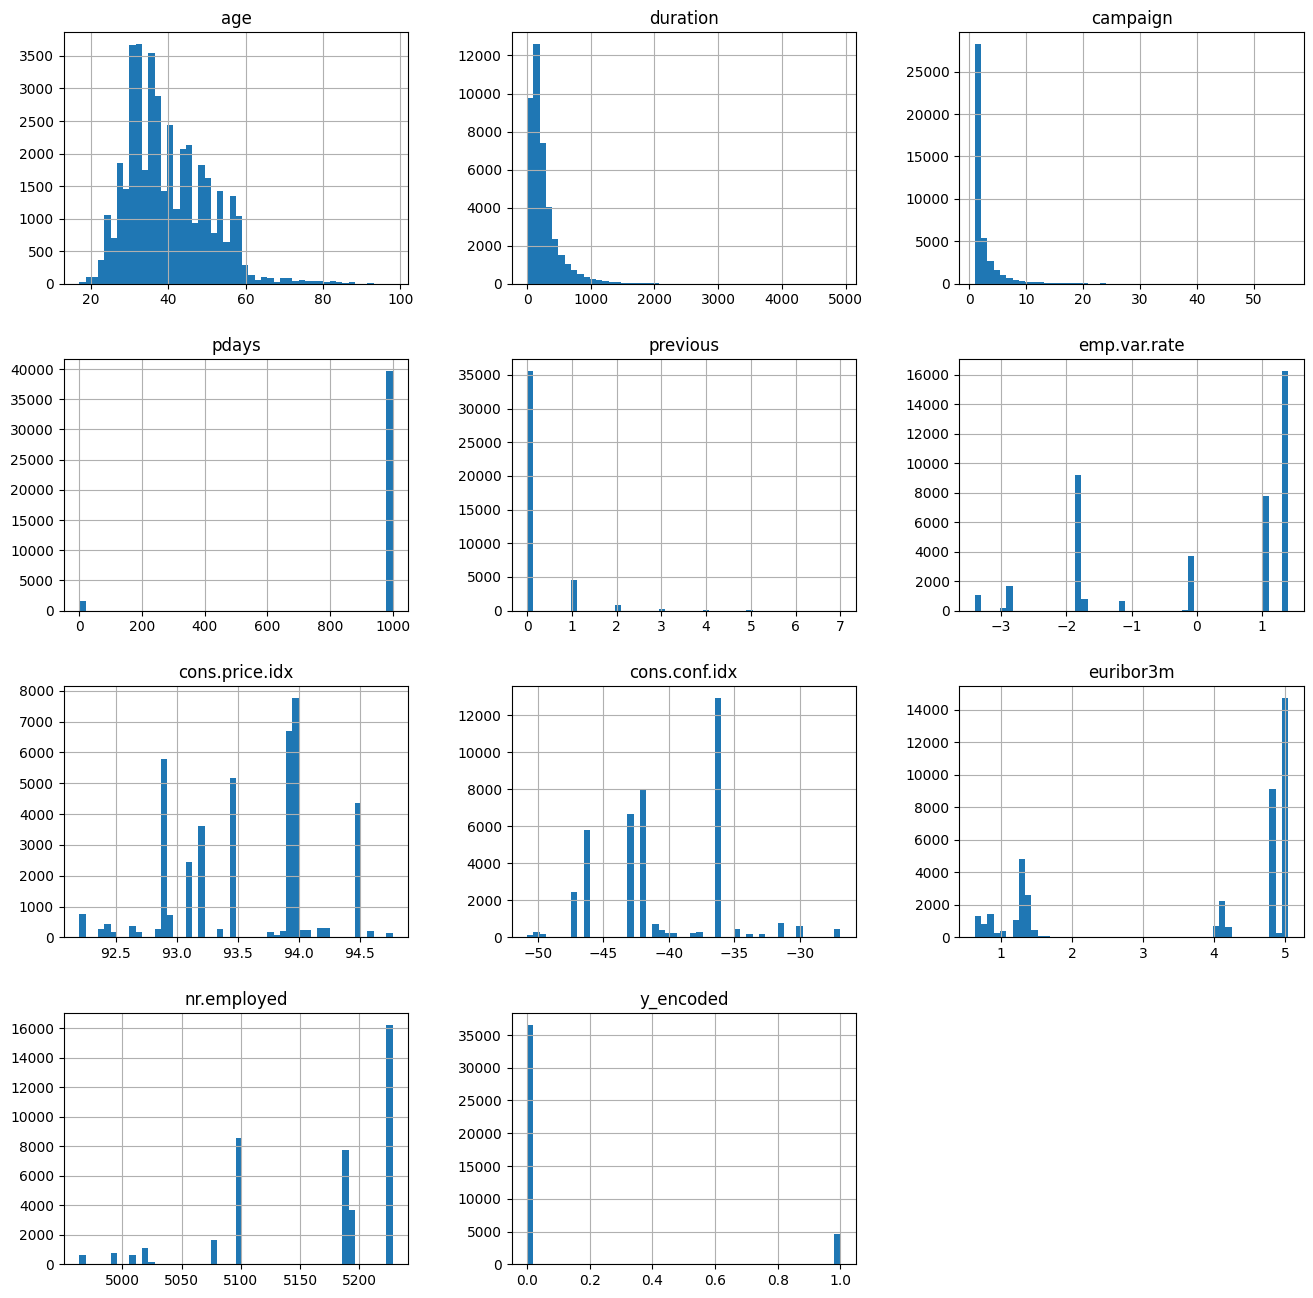

In [134]:
numeric_columns = data.select_dtypes(include = ['int64','float64'])
numeric_columns.hist(bins = 50, figsize = (16,16))
plt.show()


Comment: I created a scatter matrix to check the distribution of numerical data.

In [135]:
corr_matrix = numeric_columns.corr(numeric_only = True)
corr_matrix["y_encoded"].sort_values(ascending=False)

y_encoded         1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y_encoded, dtype: float64

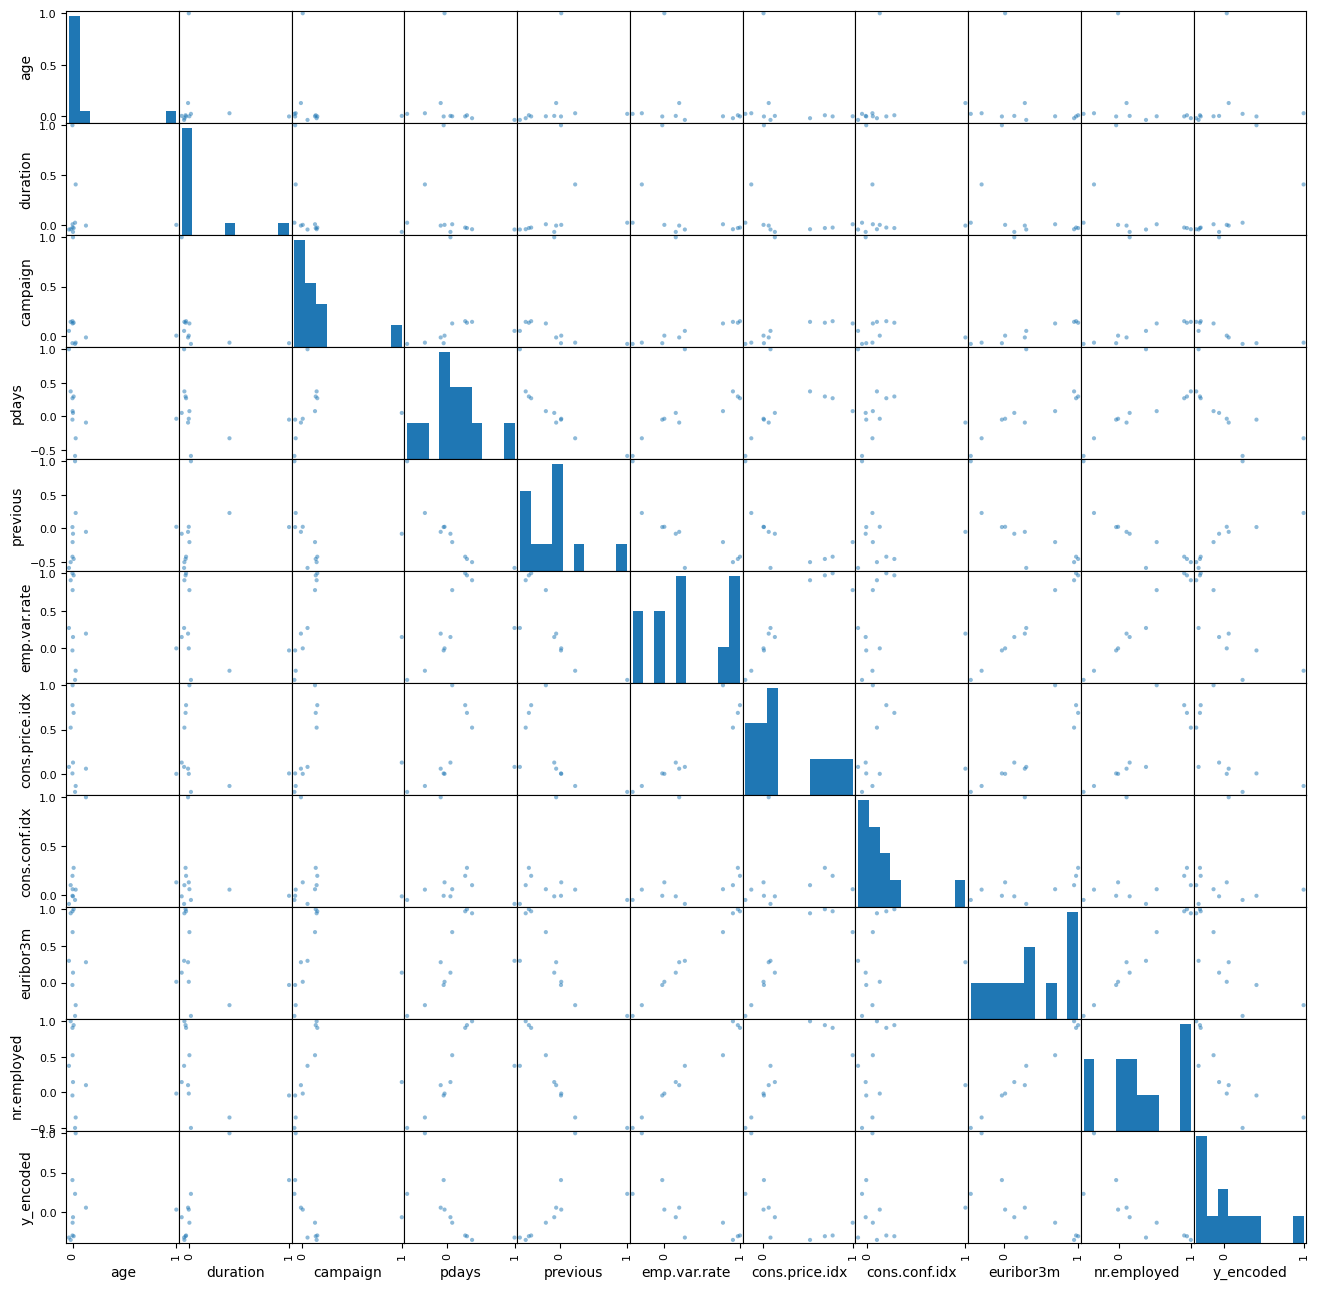

In [136]:
from pandas.plotting import scatter_matrix
scatter_matrix(corr_matrix, figsize=(16, 16))
plt.show()

Comment: I created scattermatrices for all correlations, to understand it the correlations better.

In [137]:
data["price/confidence"] = data["cons.price.idx"]/data["cons.conf.idx"]
data["campaign_difference"] = data["campaign"] - data["previous"]
data['employment_interaction'] = data['emp.var.rate'] * data['nr.employed']
data['norm_emp_var_rate'] = (data['emp.var.rate'] - data['emp.var.rate'].min()) / (data['emp.var.rate'].max() - data['emp.var.rate'].min())
data['norm_cons_price_idx'] = (data['cons.price.idx'] - data['cons.price.idx'].min()) / (data['cons.price.idx'].max() - data['cons.price.idx'].min())
data['norm_cons_conf_idx'] = (data['cons.conf.idx'] - data['cons.conf.idx'].min()) / (data['cons.conf.idx'].max() - data['cons.conf.idx'].min())
data['norm_euribor3m'] = (data['euribor3m'] - data['euribor3m'].min()) / (data['euribor3m'].max() - data['euribor3m'].min())
data['economic_stability_score'] = data[['norm_emp_var_rate', 'norm_cons_price_idx', 'norm_cons_conf_idx', 'norm_euribor3m']].mean(axis=1)
data.drop(columns=['norm_emp_var_rate', 'norm_cons_price_idx', 'norm_cons_conf_idx', 'norm_euribor3m'], inplace=True)


Comment: In the above step, I decided to create a set of new metrics, from the metrics we already have. Firstly, the ratio of price and confidence. Secondly, I created a new column called campaign_difference which is the difference in contacts between this campaign and the previous campaign. I did this because I wanted to check if an increase in contact led to better signing up rates. Thirdly, I created an interaction variable between emp variation rate and number of employees. Lastly, I created economic stability score, which is the average of normalised values of price index, confidence index and euribor rate. I did some research on these metrics to figure out it relates to economic stability hence I named it economic stability score for our model purposes. 

In [138]:
numeric_columns = data.select_dtypes(include = ['int64','float64'])
corr_matrix = numeric_columns.corr(numeric_only = True)
corr_matrix["y_encoded"].sort_values(ascending=False)

y_encoded                   1.000000
duration                    0.405274
previous                    0.230181
cons.conf.idx               0.054878
age                         0.030399
campaign                   -0.066357
price/confidence           -0.079458
campaign_difference        -0.104386
cons.price.idx             -0.136211
economic_stability_score   -0.250394
employment_interaction     -0.296450
emp.var.rate               -0.298334
euribor3m                  -0.307771
pdays                      -0.324914
nr.employed                -0.354678
Name: y_encoded, dtype: float64

**End of EDA**

Comment:I updated the correlation matrix including our new metrics. With this step, our EDA comes to an end as we move on to data cleaning and processing. To sum our EDA process up, I loaded in the necessary data and libraries, examined the shape and data structure of our dataset, and proceeded to use the value.counts() on each of our character data type variables and found out a lot of unknowns, which going by the bank-names.txt are missing values. We will treat them in the upcoming steps. Additionally, we plotted bar graphs to check the distributions of all character type data. We, then, moved to do some EDA with numeric data, creating scatter matrixes and correlation matrices. While creating correlation matrices, I encoded the y column - which has yes and nos into 1s and 0s so that we can check for correlation with our numeric variables. Additionally, I created a set of new metrics and updated them to our correlation matrix. With this, we move on to the cleaning and data preprocessing stage of the model. 

***DATA PREPARATION STAGE***

Comment: In the Data preparation stage, we will clean the data, deal with the unknowns. We will also be scaling and encoding variables and we will be dropping the features we wont be using. We have already created additional numerical variables in the EDA stage. 

**HANDLING UNKNOWN VALUES**

In [139]:
object_columns = data.select_dtypes(include=['object'])

unknown_ref = object_columns.applymap(lambda x: x == 'unknown').any(axis=1)

data_cleaned = data[~unknown_ref]

data_cleaned.shape

/tmp/ipykernel_5384/693055859.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  unknown_ref = object_columns.applymap(lambda x: x == 'unknown').any(axis=1)


(30488, 26)

Comment: I decided to remove all the rows that have an unkown in any of the charatcter type variables because I felt it would be better than imputation or treating them as a class on its own. Imputing them was a no from me considering it is a categorical variable and imputing to the most frequent value of the attribute was a no. I could have treated them as a class on its own but decided to delete the rows as I felt the dataset should be as detailed as possible.

In [140]:
# Define the columns to select
selected_columns = [
    'y', 'duration', 'previous', 'economic_stability_score', 
    'employment_interaction', 'emp.var.rate', 'euribor3m', 'pdays', 
    'nr.employed', 'job', 'education', 'marital', 'housing', 'loan'
]

# Select these columns from the DataFrame
data_selected = data_cleaned[selected_columns]
data_selected.head()


y  duration  previous  economic_stability_score  employment_interaction  \
0  no       261         0                  0.799036                  5710.1   
2  no       226         0                  0.799036                  5710.1   
3  no       151         0                  0.799036                  5710.1   
4  no       307         0                  0.799036                  5710.1   
6  no       139         0                  0.799036                  5710.1   

   emp.var.rate  euribor3m  pdays  nr.employed        job  \
0           1.1      4.857    999       5191.0  housemaid   
2           1.1      4.857    999       5191.0   services   
3           1.1      4.857    999       5191.0     admin.   
4           1.1      4.857    999       5191.0   services   
6           1.1      4.857    999       5191.0     admin.   

             education  marital housing loan  
0             basic.4y  married      no   no  
2          high.school  married     yes   no  
3             basic.6y  married      no   no  
4          high.school  married      no  yes  
6  professional.course  married      no   no

Comment: After the removal of the unknown values, I decided to update the correlation matrix and noticed a slight fall in the correlation values of duration and previous campaign mainly. 

**SPLITTING TRAIN AND TEST DATA**


In [141]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    data_selected, test_size=0.2, stratify=data_selected["y"], random_state=42)

Comment: In the above line of code, I split the training and test data and stratified it based on the y_encoded columns. I did not create bins as our data had just 0s and 1s as possible values

In [142]:
data_cleaned_1 = strat_train_set.drop("y", axis=1)
data_cleaned_labels = strat_train_set["y"].copy()

Comment: I created a new dataframe data_cleaned_1 dropping our target variable. 

In [143]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

num_data = data_cleaned_1.select_dtypes(include=[np.number])
obj_data = data_cleaned_1.select_dtypes(include= [object])

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)


Comment: In the above lines of code, I create a data pipeline, which imputes numerical data to their median values and applied one hot encoding to categorical data. 

**END OF DATA PREPROCESSING**                          
With this, the data preprocessing is done. In summary, we removed the unknown values, split the data into test and train sets, checked for outliers. We did not remove the outliers because around 25% of the dataset were shown as outliers. Additionally, that would reduce the size of our test data even more. After this, we created a pipeline to transform our data - with numerical data getting treated with a min max scaling while also immputing possible missing values to their median. To deal with categorical data, we removed the unknowns and then applied one hot encoding to the categorical variables. 


**MODEL TRAINING AND SELECTION**

In [144]:
from sklearn.tree import DecisionTreeClassifier
DTC_1 = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
DTC_1.fit(data_cleaned_1, data_cleaned_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f91b39d6290>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f91b39d64a0>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [145]:
predictions = DTC_1.predict(data_cleaned_1)


In [146]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(data_cleaned_labels, predictions)
print(conf_matrix)


[[21303     0]
 [    0  3087]]


After running our initial decision tree model, we print a confusion matrix to see that there are no errors. Everthing is either a true positive or a true negative. This is because of heavy overfitting our training data. 

In [147]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(DTC_1, data_cleaned_1, data_cleaned_labels, cv=5)
accuracies.mean()


0.8796227962279624

In [148]:
pd.Series(accuracies).describe()

count    5.000000
mean     0.879623
std      0.006173
min      0.869004
25%      0.879869
50%      0.881509
75%      0.883764
max      0.883969
dtype: float64

Comment: After doing five fold cross validation, we get an average accuracy of 87.97%. This still says that there is heavy overfitting happening, which might be because of the heavy one hot encoding done earlier - making all the data points super specific. 

**SGD Classifier**

In [149]:
from sklearn.linear_model import SGDClassifier 
sgd_clf_1 = make_pipeline(preprocessing, SGDClassifier(random_state=42))
sgd_clf_1.fit(data_cleaned_1, data_cleaned_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f91b39d6290>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f91b39d64a0>)])),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [150]:
predictions_sgd = sgd_clf_1.predict(data_cleaned_1)

In [151]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(sgd_clf_1, data_cleaned_1, data_cleaned_labels, cv=5)
accuracies.mean()

0.8935219352193522

In [152]:
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(data_cleaned_labels, predictions_sgd)
print(conf_matrix1)

[[20503   800]
 [ 1720  1367]]


Comment: So I ran both DecisionTreeClassifier and SGDClassifier. My Decision Tree Classifier showed all correct values in the confusion matrix and it returned a 87% accuracy when cross validation. I suspect a heavy overfitting of data. THE SGD Classifier returned some false positives and false negatives in the confusion matrix, and it returned a score of around 89%. For this reason, I will be procedding with SGD Classifier as our final mode. 

**END OF MODEL TRAINING AND EVALUATION**

**FINE TUNING OUR MODEL**

Comment: We will be using our SGDClassifier as our final model. We will now proceed to fine tune the model.

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
       ("preprocessing", preprocessing),
       ("sgd_clf", SGDClassifier(random_state=42)),
   ])
param_grid = {
    'sgd_clf__alpha': [0.0001, 0.001, 0.01],
    'sgd_clf__loss': ['hinge', 'log_loss'],  
    'sgd_clf__penalty': ['l2', 'l1'],
}

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                              scoring='accuracy')

In [154]:
grid_search.fit(data_cleaned_1, data_cleaned_labels)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f91b39d6290>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f91b39d64a0>)])),
                                       ('sgd_clf',
                                        SGDClassifier(random_state=42))]),
             param_grid={'sgd_clf__alpha': [0.0001, 0.001, 0.01],
                         'sgd_clf__loss': ['hinge', 'log_loss'],
                         'sgd_clf__penalty': ['l2', 'l1']},
             scoring='accuracy')

In [155]:
grid_search.best_params_

{'sgd_clf__alpha': 0.001,
 'sgd_clf__loss': 'log_loss',
 'sgd_clf__penalty': 'l1'}

In [156]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f91b81a7ca0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f91b81a7fa0>)])),
                ('sgd_clf',
                 SGDClassifier(alpha=0.001, loss='log_loss', penalty='l1',
                               random_state=42))])

In [157]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7        0.109259      0.002383         0.031969        0.000742   
6        0.095070      0.001176         0.033616        0.002357   
10       0.114544      0.043877         0.053691        0.030092   
2        0.136916      0.007534         0.031696        0.000239   
11       0.097111      0.001447         0.032974        0.001581   
0        0.124014      0.011401         0.032631        0.001296   
3        0.190656      0.027296         0.032158        0.000837   
1        0.180741      0.015257         0.050717        0.013767   
4        0.100402      0.007277         0.033022        0.002396   
5        0.149896      0.038810         0.035826        0.002274   
8        0.077100      0.001771         0.037063        0.001569   
9        0.086546      0.000578         0.032519        0.001311   

   param_sgd_clf__alpha param_sgd_clf__loss param_sgd_clf__penalty  \
7                 0.001            log_loss                     l1   
6                 0.001            log_loss                     l2   
10                 0.01            log_loss                     l2   
2                0.0001            log_loss                     l2   
11                 0.01            log_loss                     l1   
0                0.0001               hinge                     l2   
3                0.0001            log_loss                     l1   
1                0.0001               hinge                     l1   
4                 0.001               hinge                     l2   
5                 0.001               hinge                     l1   
8                  0.01               hinge                     l2   
9                  0.01               hinge                     l1   

                                               params  split0_test_score  \
7   {'sgd_clf__alpha': 0.001, 'sgd_clf__loss': 'lo...           0.898524   
6   {'sgd_clf__alpha': 0.001, 'sgd_clf__loss': 'lo...           0.899385   
10  {'sgd_clf__alpha': 0.01, 'sgd_clf__loss': 'log...           0.898770   
2   {'sgd_clf__alpha': 0.0001, 'sgd_clf__loss': 'l...           0.898893   
11  {'sgd_clf__alpha': 0.01, 'sgd_clf__loss': 'log...           0.897048   
0   {'sgd_clf__alpha': 0.0001, 'sgd_clf__loss': 'h...           0.892620   
3   {'sgd_clf__alpha': 0.0001, 'sgd_clf__loss': 'l...           0.891882   
1   {'sgd_clf__alpha': 0.0001, 'sgd_clf__loss': 'h...           0.895818   
4   {'sgd_clf__alpha': 0.001, 'sgd_clf__loss': 'hi...           0.891513   
5   {'sgd_clf__alpha': 0.001, 'sgd_clf__loss': 'hi...           0.892866   
8   {'sgd_clf__alpha': 0.01, 'sgd_clf__loss': 'hin...           0.891513   
9   {'sgd_clf__alpha': 0.01, 'sgd_clf__loss': 'hin...           0.886593   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
7            0.903444           0.902952         0.901640        0.002213   
6            0.902214           0.900984         0.900861        0.001158   
10           0.895572           0.899754         0.898032        0.001785   
2            0.892866           0.900984         0.897581        0.003442   
11           0.894096           0.898155         0.896433        0.001713   
0            0.898032           0.897540         0.896064        0.002444   
3            0.895203           0.899139         0.895408        0.002966   
1            0.894465           0.893727         0.894670        0.000866   
4            0.891636           0.892866         0.892005        0.000611   
5            0.890037           0.888807         0.890570        0.001699   
8            0.889299           0.889914         0.890242        0.000933   
9            0.884871           0.887331         0.886265        0.001031   

    rank_test_score  
7                 1  
6                 2  
10                3  
2                 4  
11                5  
0                 6  
3                 7  
1                 8  
4                 9

Comment: The output from GridSearchCV shows the best-performing SGDClassifier configuration for a classification task, having optimized hyperparameters alpha=0.001, loss='log_loss', and penalty='l1'. The results are sorted by mean cross-validation accuracy, with the top row representing the best parameter set. This optimized classifier can now be used to predict our final test data to confirm its generalizability. The `best_estimator_` from the grid search encapsulates a model that's expected to perform optimally within the explored parameter range.

**TESTING IT OUT ON TEST DATA**

In [158]:
X_test = strat_test_set.drop("y", axis=1)
y_test = strat_test_set["y"].copy()

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_predictions


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

In [159]:
from sklearn.metrics import confusion_matrix
conf_matrix2 = confusion_matrix(y_test, final_predictions)
print(conf_matrix2)

[[5156  170]
 [ 478  294]]


In [160]:
accuracies = cross_val_score(final_model, X_test, y_test, cv=5)
accuracies.mean()

0.8901270861630739

Comment: Having run our model on our test data, we get an accuracy of around 89% for the SGD Model. We created this using a pipeline that does the preprocessing, trains the model, fine tunes it and then tests it on our test data. 

**FINAL THOUGHTS AND CONCLUSION**  
Obviously, the model performed reasonably well but I suspect overfitting of training data, the SGD classifier gave us an accuracy of almost 90% after all the tuning and preprocessing. The model gave us a 89% accuracy when tested on our test data after multi fold cross validation and hyper parameter tuning on our training data. However, the model is not perfect yet. There are a couple of things we can do to improve our model. Firstly, a dataset containing 40000 rows might not be enough for a large scaled detailed end to end ML project, so we should be looking to collect more data, which in turn would have helped the model train better. Additionally, we deleted all the unknowns, had they not been missing, or had some values we could have treated them better. Lastly, more domain expertise on metrics like euribor score etc would help me understand the dataset much better, as it can help us derive additional metrics.

**DONE BY KEERTHI KRISHNA AIYAPPAN**